In [375]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA
import os



In [376]:
df = pd.read_csv("Sample_KDD(2).csv")

X = df.drop("class", axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)
df.head()


duration  src_bytes  dst_bytes  count  srv_count  serror_rate  \
0         0        520          0    428        428          0.0   
1         0          0          0    131         18          0.0   
2         0          0          0     20          8          1.0   
3         0       1235        404      1          4          0.0   
4         0        224       1415      1          1          0.0   

   srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  ...  \
0              0.0          0.0              0.0           1.00  ...   
1              0.0          1.0              1.0           0.14  ...   
2              1.0          0.0              0.0           0.40  ...   
3              0.0          0.0              0.0           1.00  ...   
4              0.0          0.0              0.0           1.00  ...   

   dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                 255                    1.00                    0.00   
1                  18                    0.07                    0.06   
2                  68                    0.27                    0.02   
3                 179                    0.72                    0.12   
4                  48                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         1.00                         0.00   
1                         0.00                         0.00   
2                         0.01                         0.00   
3                         0.04                         0.02   
4                         0.02                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                      0.00                  0.00   
1                   0.0                      0.00                  1.00   
2                   1.0                      1.00                  0.00   
3                   0.0                      0.01                  0.04   
4                   0.0                      0.00                  0.00   

   dst_host_srv_rerror_rate    class  
0                       0.0  anomaly  
1                       1.0  anomaly  
2                       0.0  anomaly  
3                       0.0   normal  
4                       0.0   normal  

[5 rows x 23 columns]

In [377]:
print(len(X_train), len(X_test))
print(y_train.value_counts(normalize=True),"\n")
print(y_test.value_counts(normalize=True))


140 60
class
anomaly    0.5
normal     0.5
Name: proportion, dtype: float64 

class
normal     0.5
anomaly    0.5
Name: proportion, dtype: float64


In [378]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Perceptron Accuracy:", accuracy)


Perceptron Accuracy: 0.9166666666666666


In [379]:
for k in [2, 3, 4,5]:# k=5 is here to tell that k=4 is the best
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_train)

    temp = X_train.copy()
    temp["Cluster"] = clusters
    temp["Class"] = y_train.values

    print(f"\nResults for k = {k}")
    print(pd.crosstab(temp["Cluster"], temp["Class"], normalize='index') * 100,"")



Results for k = 2
Class      anomaly      normal
Cluster                       
0        50.359712   49.640288
1         0.000000  100.000000 

Results for k = 3
Class      anomaly      normal
Cluster                       
0        50.724638   49.275362
1         0.000000  100.000000
2         0.000000  100.000000 

Results for k = 4
Class    anomaly  normal
Cluster                 
0           50.0    50.0
1            0.0   100.0
2            0.0   100.0
3          100.0     0.0 

Results for k = 5
Class       anomaly      normal
Cluster                        
0         52.713178   47.286822
1          0.000000  100.000000
2          0.000000  100.000000
3        100.000000    0.000000
4          0.000000  100.000000 


In [380]:
centroids = kmeans.cluster_centers_ # center
pred_clusters = kmeans.predict(X_train)
'''for each dp , find which cluster it belongs to
meaning it holds cluster ids '''
cluster_labels = {}
for c in np.unique(pred_clusters): # for example ( for c in [normal,anomaly])
    labels_in_cluster = y_train[pred_clusters == c]
    ''' select the real class labels of only
    those data points that belong to cluster c'''

    cluster_labels[c] = labels_in_cluster.mode()[0]
    '''all the true label in labels_in_cluster , only points assigned to c
    so example :
    cluster 1*************************
    labels_in_cluster = [0, 0, 1]
    mode = 0
    cluster_labels[1] = 0
     Cluster 2*********************
    labels_in_cluster = [1]
    mode = 1
    cluster_labels[2] = 1
      '''

final_preds = [cluster_labels[c] for c in pred_clusters]
'''If a point belongs to cluster c, predict the class assigned to that cluster'''
accuracy = accuracy_score(y_train, final_preds)# ypred
print("Centroid Classification Accuracy:", accuracy)


Centroid Classification Accuracy: 0.5642857142857143


In [381]:
#Task 2



In [382]:
mall_df = pd.read_csv("mall_customer.csv")
mall_df.head()

CustomerID        Name  Age  Gender MembershipLevel   IncomeLevel  \
0   CUST0000  Customer_0   23    Male          Bronze  43734.057598   
1   CUST0001  Customer_1   21  Female          Bronze  53229.904790   
2   CUST0002  Customer_2   23  Female          Silver  41903.089965   
3   CUST0003  Customer_3   19  Female          Silver  40575.517959   
4   CUST0004  Customer_4   26    Male          Silver  47890.510528   

   ElectronicsSpending  ClothingSpending  GrocerySpending  HomeSpending  \
0           421.738120        222.416482       194.309524    131.799461   
1           467.554482        241.555132       212.701111    203.246186   
2           564.884286        364.085059       134.182906    157.556463   
3           487.269371        238.419877       245.585954      0.000000   
4           374.697221        101.212940         0.000000      0.000000   

   Visits  PurchaseFrequency  OnlineActivity  EmailOpens   AppUsage  \
0       9                  4       10.804471   23.810324  13.744780   
1       6                  1       23.475629   23.993963  14.298908   
2       5                  1       20.766293   26.572725  16.614999   
3       7                  2       25.365966   23.977572  26.703732   
4       7                  1       25.380213   25.910984  16.057935   

   LoyaltyPoints  
0     132.083987  
1     136.004198  
2      95.197492  
3     169.129556  
4     154.911339

In [383]:
mall_df.dtypes


CustomerID              object
Name                    object
Age                      int64
Gender                  object
MembershipLevel         object
IncomeLevel            float64
ElectronicsSpending    float64
ClothingSpending       float64
GrocerySpending        float64
HomeSpending           float64
Visits                   int64
PurchaseFrequency        int64
OnlineActivity         float64
EmailOpens             float64
AppUsage               float64
LoyaltyPoints          float64
dtype: object

In [384]:
mall_num_cols = mall_df.select_dtypes(include=['int64', 'float64']).columns

mall_cat_cols = ['Gender', 'MembershipLevel']

mall_df.Gender.unique()
mall_df.MembershipLevel.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [385]:
mall_cat_encoded = pd.get_dummies(
    mall_df[mall_cat_cols],
    drop_first=True
)
mall_cat_encoded.astype(int).head()

Gender_Male  MembershipLevel_Gold  MembershipLevel_Silver
0            1                     0                       0
1            0                     0                       0
2            0                     0                       1
3            0                     0                       1
4            1                     0                       1

In [386]:
mall_scaler = StandardScaler()
mall_num_scaled = mall_scaler.fit_transform(
    mall_df[mall_num_cols]
)
print(mall_num_scaled.shape,mall_cat_encoded.shape)

(500, 12) (500, 3)


In [387]:
mall_X = np.hstack((
    mall_num_scaled,
    mall_cat_encoded.values
))
mall_X.shape


(500, 15)

In [388]:
print(mall_X.shape)
print(mall_df.shape)


(500, 15)
(500, 16)


In [389]:
mall_k = 3
mall_kmeans = KMeans(
    n_clusters=mall_k,
    random_state=40
)

mall_clusters = mall_kmeans.fit_predict(mall_X)
mall_clusters.shape


(500,)

In [403]:
mall_df["MallCluster"] = mall_clusters
mall_df["MallCluster"].shape


(500,)

In [391]:
mall_df["MallCluster"].value_counts()


MallCluster
0    300
1    100
2    100
Name: count, dtype: int64

In [392]:
mall_df.groupby("MallCluster")[[
    "IncomeLevel",
    "ElectronicsSpending",
    "ClothingSpending",
    "GrocerySpending",
    "HomeSpending",
    "LoyaltyPoints"
]].mean()


IncomeLevel  ElectronicsSpending  ClothingSpending  \
MallCluster                                                        
0            75503.312235          1364.828484        866.322554   
1            45492.545015           487.900299        181.074804   
2            43704.854340           969.125624        911.206274   

             GrocerySpending  HomeSpending  LoyaltyPoints  
MallCluster                                                
0                 397.957155    825.786287     404.432014  
1                 198.622869    134.809817     141.931559  
2                 275.091259    448.764177     181.652490

In [393]:
assert mall_X.shape[0] == mall_df.shape[0]
assert len(mall_clusters) == mall_df.shape[0]
assert "MallCluster" in mall_df.columns


In [394]:
#task 3

In [395]:
image_folder = "plant_Images"  # folder containing images


In [408]:
for image_name in os.listdir(image_folder):

    image_path = os.path.join(image_folder, image_name)

    img = cv2.imread(image_path)
    if img is None:
        continue
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    print(f"\nProcessing image: {image_name}")

assert img_rgb.shape==img.shape


Processing image: image_005.png

Processing image: image_001.png

Processing image: image_004.JPG

Processing image: image_006.png

Processing image: image_002.png

Processing image: image_003.png


In [397]:
pixel_data = img_rgb.reshape((-1, 3))
pixel_data = np.float32(pixel_data)


In [398]:
print(pixel_data.shape)

(578908, 3)


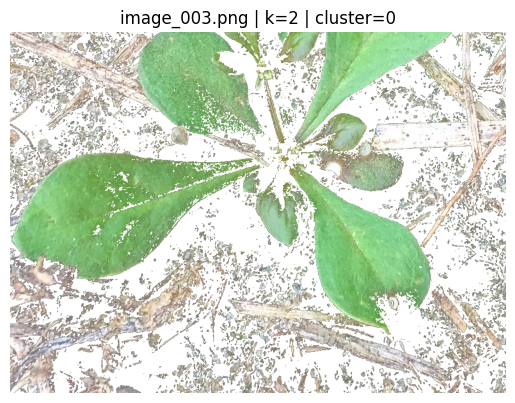

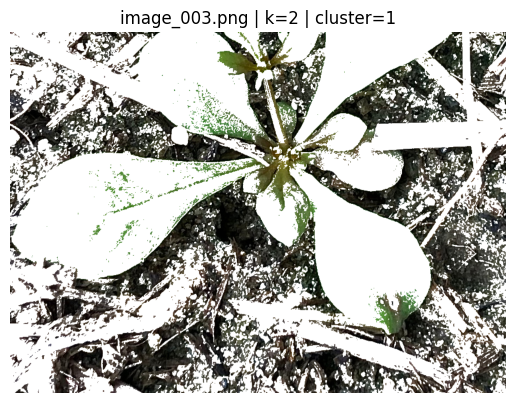

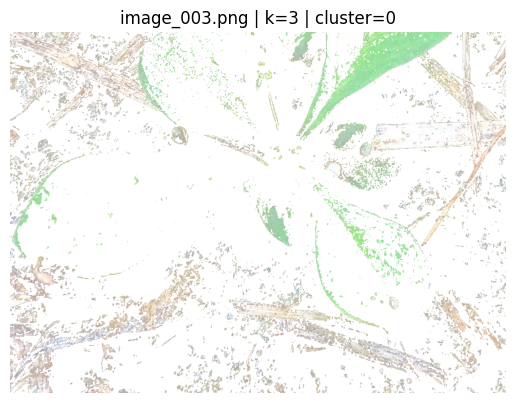

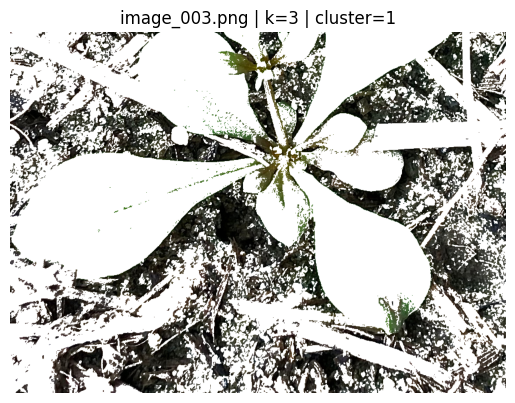

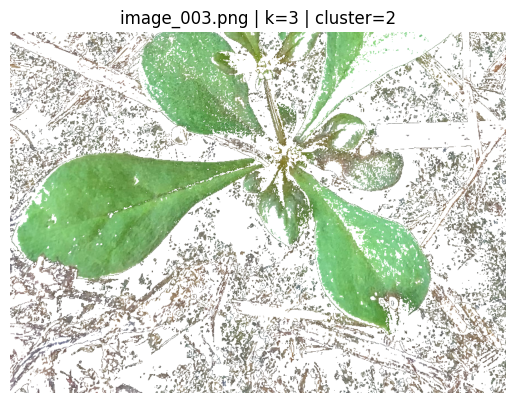

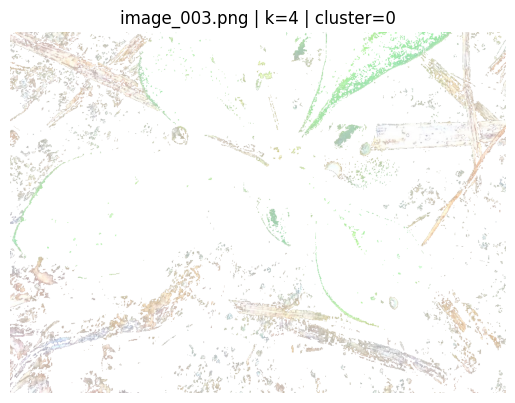

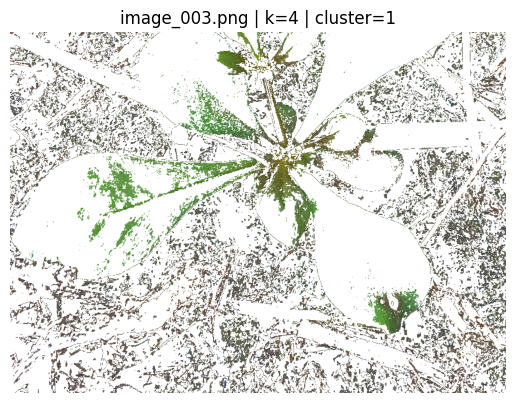

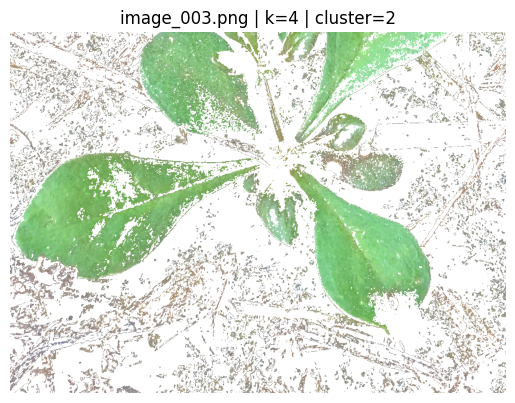

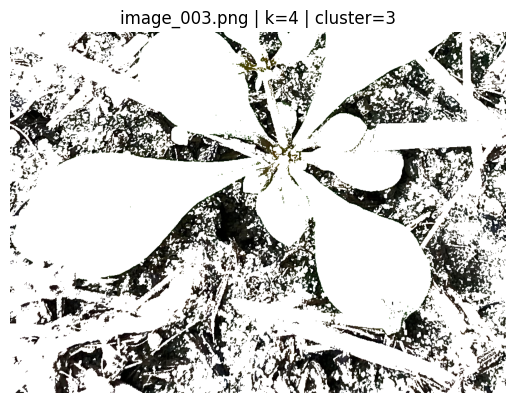

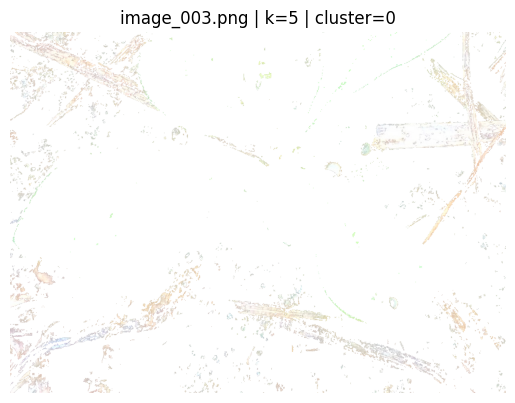

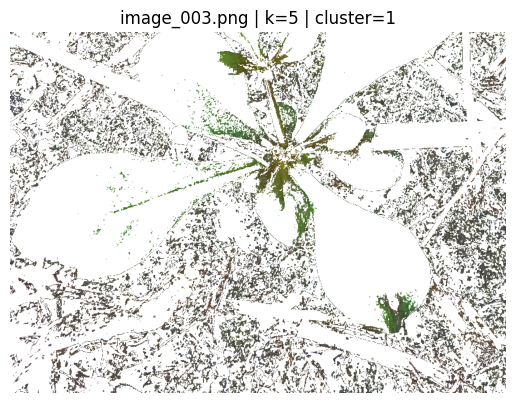

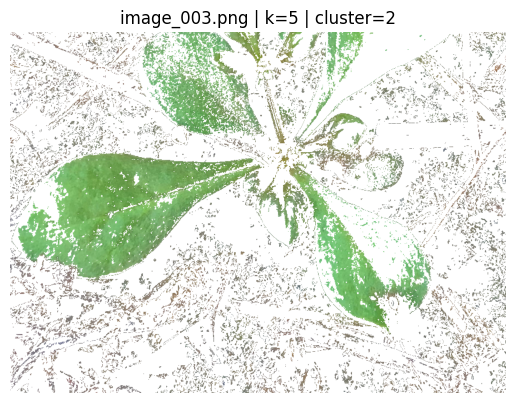

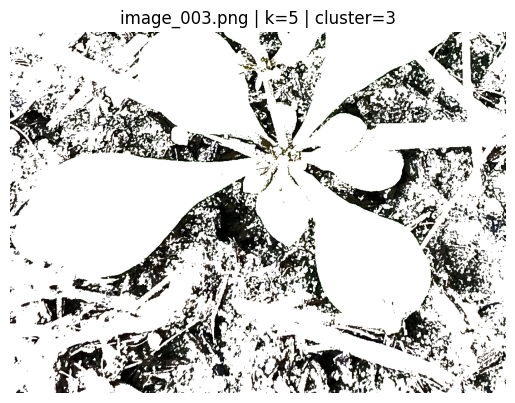

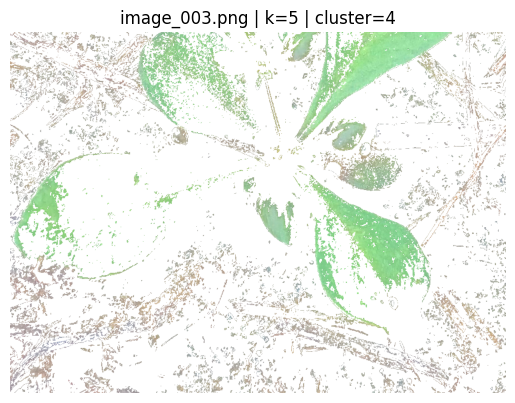

In [417]:
for k in [2, 3, 4, 5]:
        kmeans_img = KMeans(n_clusters=k, random_state=42)
        pixel_labels = kmeans_img.fit_predict(pixel_data)

        for cluster_id in range(k):
            segmented_pixels = np.ones_like(pixel_data) * 255
            segmented_pixels[pixel_labels == cluster_id] = pixel_data[pixel_labels == cluster_id]

            segmented_image = segmented_pixels.reshape(img_rgb.shape).astype(np.uint8)
            plt.figure()
            plt.imshow(segmented_image)
            plt.title(f"{image_name} | k={k} | cluster={cluster_id}")
            plt.axis("off")
            plt.show()


In [419]:
pixel_data.shape

(578908, 3)

In [416]:
pixel_labels.shape

(578908,)

In [401]:
np.unique(pixel_labels)

array([0, 1, 2, 3, 4], dtype=int32)